<a href="https://colab.research.google.com/github/Blatts01/PizzaSlicer/blob/main/RL_RPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup env variables
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Install requirements
!pip install gymnasium
!pip install numpy
!pip install torch
!pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.2 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=026b6b9a21562d7d01dd889025fed00a86f081cb4df9a3a8e26d3d85f644abf2
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


Pizza slice with start angle 10 and stop angle 20 have sum of: 214.7720668537571 
214.7720668537571
SUM: 214.7720668537571


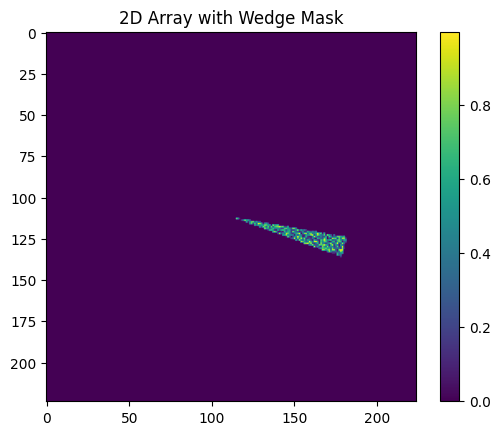

In [ ]:
import os
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Ellipse, Wedge
import cv2.dnn

class PizzaSlice():
  def __init__(self, center, dim, pizza):
    self.__dim = dim
    self.__start_angle = 0
    self.__stop_angle = 0
    self.__center = center
    self.__pizza = pizza
    self.__pizza_orig = pizza.copy()
    self.__slice_sum = 0
    self.__radius = self.radius_length(center[0],center[1],dim[0],dim[1])
    self.__person_num = -1

  def __gen_slice_mask(self):
    # Create a binary pizza slice mask
    mask = np.zeros((np.shape(self.__pizza)[0], np.shape(self.__pizza)[1]), dtype=bool)
    for i in range(np.shape(self.__pizza)[0]):
        for j in range(np.shape(self.__pizza)[1]):
            x = j
            y = i
            if self.__slice_path.contains_point((x, y)):
                mask[i, j] = True
    self.__slice_mask = mask.copy()

  def radius_length(self,x_center, y_center, width, height):
      diagonal = math.sqrt(width ** 2 + height ** 2)
      return diagonal/2

  def cut_slice(self, start_angle, stop_angle):
    self.__start_angle = start_angle
    self.__stop_angle = stop_angle
    self.__slice = Wedge(self.__center, self.__radius, self.__start_angle, self.__stop_angle)
    self.__slice_path = Path(self.__slice.get_path().vertices)
    self.__gen_slice_mask()
    self.__pizza[~self.__slice_mask] = 0

  def get_slice(self):
    self.__slice_sum = np.sum(self.__pizza)
    print("Pizza slice with start angle {} and stop angle {} have sum of: {} ".format(self.__start_angle, self.__stop_angle, self.__slice_sum))
    return self.__slice_sum

  def get_raw_mask(self):
    return self.__slice_mask

  def get_pizza_cut(self):
    return self.__pizza.copy()

  def reset_slicer(self):
    self.__start_angle = 0
    self.__stop_angle = 0
    self.__pizza = self.__pizza_orig.copy()
    self.__slice_sum = 0

  def set_person(self,person_num):
    self.__person_num = person_num

  def get_person(self):
    return self.__person_num

# Create a wedge
center = (112, 112)  # Center of the 224x224 array
dim = (100,100)  # Adjust the radius as needed
theta1 = 10  # Starting angle
theta2 = 20  # Ending angle

# Create your 224x224 sample 2D array (modify this part as needed)
data = np.random.random((224, 224))

part = PizzaSlice(center,dim,data)
part.cut_slice(theta1,theta2)
print(part.get_slice())

pizza_slice = part.get_pizza_cut()

# Apply the mask to zero out elements outside the wedge

print("SUM: {}".format(np.sum(pizza_slice)))

# Visualize the masked data
plt.imshow(pizza_slice, cmap='viridis')
plt.colorbar()
plt.title('2D Array with Wedge Mask')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/content/data/pizza_5507-jpg_jpg.rf.cb10986f50f552f9d5c9d3df26262192.jpg


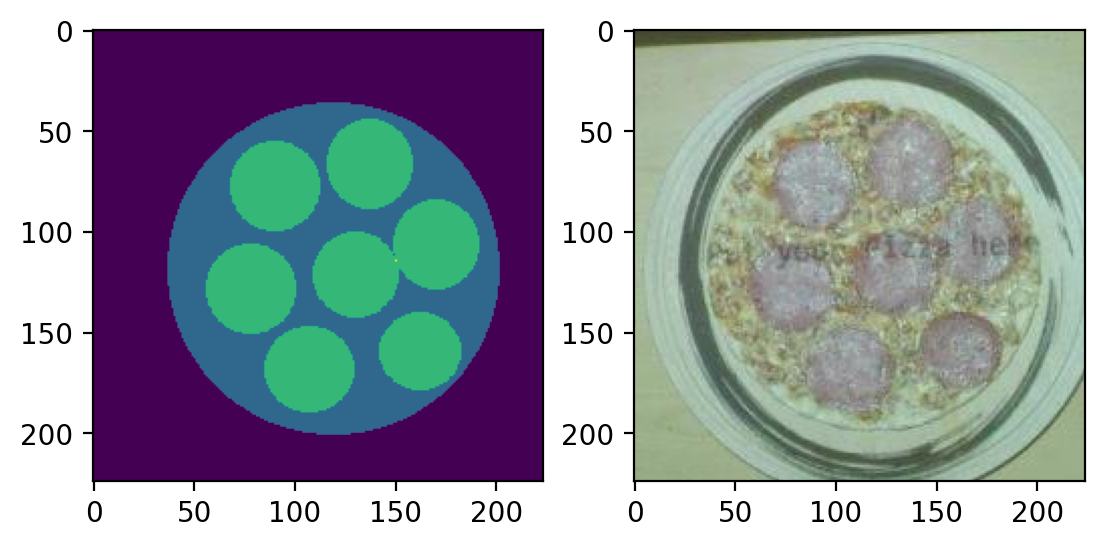

[88, 268]
Pizza slice with start angle 88 and stop angle 268 have sum of: 15485 
Pizza slice with start angle 268 and stop angle 88 have sum of: 16317 
[88, 155, 268, 335]


<ipython-input-12-a486adb53a69>:257: RuntimeWarning: divide by zero encountered in double_scalars
  reward = 1 - (self.__ideal_value/people_dict[str(max_diff_key)])


Pizza slice with start angle 88 and stop angle 155 have sum of: 5878 
Pizza slice with start angle 155 and stop angle 268 have sum of: 9607 
Pizza slice with start angle 268 and stop angle 335 have sum of: 6082 
Pizza slice with start angle 335 and stop angle 88 have sum of: 10237 
[88, 155, 174, 268, 335, 354]
Pizza slice with start angle 88 and stop angle 155 have sum of: 5878 
Pizza slice with start angle 155 and stop angle 174 have sum of: 1760 
Pizza slice with start angle 174 and stop angle 268 have sum of: 7847 
Pizza slice with start angle 268 and stop angle 335 have sum of: 6082 
Pizza slice with start angle 335 and stop angle 354 have sum of: 2004 
Pizza slice with start angle 354 and stop angle 88 have sum of: 8235 


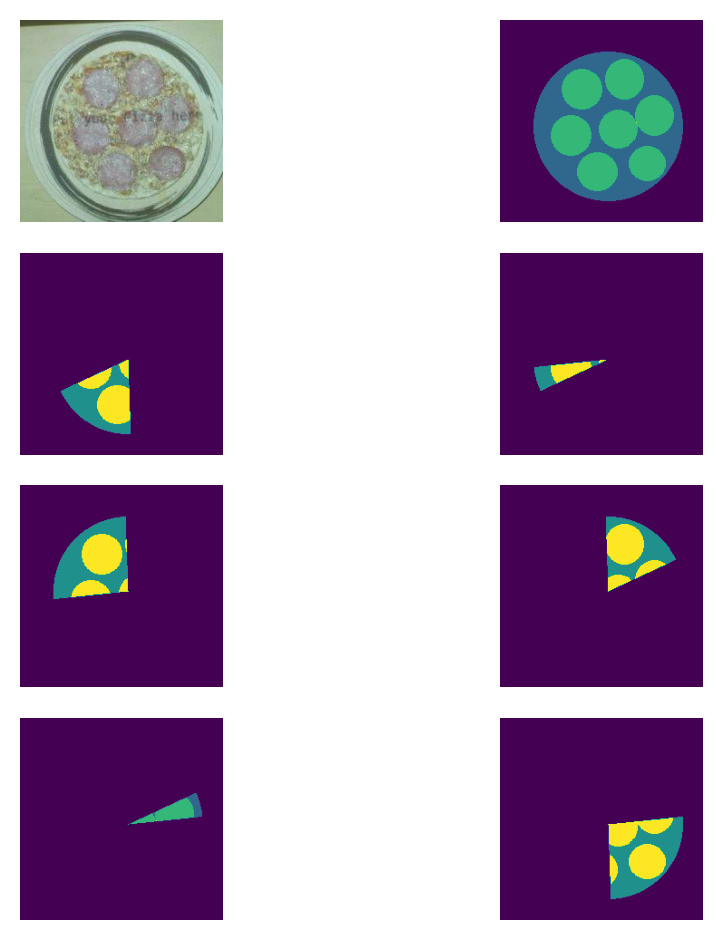

In [ ]:
from weakref import ref
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Ellipse, Wedge
import cv2.dnn

class PizzaSliceModel():
  def __init__(self, num_of_pepoles=(2,4), yolo_model='path_to_yolov8n_model', pizza_path='path_to_pizza_images'):
    self.__peoples = num_of_pepoles
    self.__step = 0
    self.__max_steps = 4 if num_of_pepoles != 3 else 3
    self.__pizza_path = pizza_path
    self.__model_path = yolo_model
    self.__slice_list = []
    self.__slice_angels = []
    self.__get_pizza_base()
    self.__setup_yolo_model()
    self.__prepare_yolo_input()
    self.__build_virtual_pizza()

  def __get_pizza_base(self):
    image_files = [f for f in os.listdir(self.__pizza_path) if f.endswith(('.jpg', '.jpeg'))]
    random_image = random.choice(image_files)
    self.__pizza_image_path = os.path.join(self.__pizza_path, random_image)
    self.__pizza_image = cv2.imread(self.__pizza_image_path)
    print(self.__pizza_image_path)

  def __setup_yolo_model(self):
    model: cv2.dnn.Net = cv2.dnn.readNetFromONNX(self.__model_path)
    self.__onnx_model = model

  def __prepare_yolo_input(self):
    [height, width, _] = self.__pizza_image.shape
    length = max((height, width))
    image = np.zeros((length, length, 3), np.uint8)
    image[0:height, 0:width] = self.__pizza_image
    self.__model_scale = length / 224
    self.__model_input = cv2.dnn.blobFromImage(image, scalefactor=1 / 255, size=(224, 224), swapRB=True)

  def __run_yolo_detection(self):
    self.__onnx_model.setInput(self.__model_input)
    outputs = self.__onnx_model.forward()
    outputs = np.array([cv2.transpose(outputs[0])])
    rows = outputs.shape[1]
    boxes = []
    scores = []
    class_ids = []
    for i in range(rows):
        classes_scores = outputs[0][i][4:]
        (minScore, maxScore, minClassLoc, (x, maxClassIndex)) = cv2.minMaxLoc(classes_scores)
        if maxScore >= 0.25:
            box = [
                outputs[0][i][0] , outputs[0][i][1],
                outputs[0][i][2], outputs[0][i][3]]
            boxes.append(box)
            scores.append(maxScore)
            class_ids.append(maxClassIndex)

    # Apply NMS (Non-maximum suppression)
    result_boxes = cv2.dnn.NMSBoxes(boxes, scores, 0.25, 0.45, 0.5)
    detections = []
    tmp_list = []
    self._yolo_detection = []
    # Iterate through NMS results to draw bounding boxes and labels
    for i in range(len(result_boxes)):
        index = result_boxes[i]
        box = boxes[index]
        detection = {
            'class_id': class_ids[index],
            'confidence': scores[index],
            'box': box,
            'scale': self.__model_scale}
        detections.append(detection)
        tmp_list.append(box[0])
        tmp_list.append(box[1])
        tmp_list.append(box[2])
        tmp_list.append(box[3])
        tmp_list.append(class_ids[index])
        self._yolo_detection.append(tmp_list)
        tmp_list = []
    return detections

  def __build_virtual_pizza(self):
    detections = self.__run_yolo_detection()
    base_array = np.zeros((224,224), dtype=np.uint8)
    found_pizza = False
    pepperoni_map = []
    for item in detections:
      if item['class_id'] == 1 and not found_pizza:
          self._pizza_center_x = round(item['box'][0])
          self._pizza_center_y = round(item['box'][1])
          self._pizza_width = round(item['box'][2])
          self._pizza_height = round(item['box'][3])
          self._pizza_width_axe = round((item['box'][2]/2))
          self._pizza_height_axe = round((item['box'][3]/2))
          pizza_base = cv2.ellipse(base_array,(self._pizza_center_x, self._pizza_center_y),(self._pizza_width_axe, self._pizza_height_axe), 0, 0, 360,1,-1)
          found_pizza = True
      else:
          tmp_base = np.zeros((224,224), dtype=np.uint8)
          pepperoni_map.append(cv2.ellipse(tmp_base,(round(item['box'][0]), round(item['box'][1])),(round((item['box'][2]/2)), round((item['box'][3]/2))), 0, 0, 360,1,-1))

    pizza_heatmap = pizza_base.copy()
    #remove pepperoni detection outside the pizza
    for pepperoni in pepperoni_map:
        tmp_map = cv2.bitwise_and(pizza_base,pepperoni)
        pizza_heatmap = pizza_heatmap + tmp_map

    self.__pizza_heatmap = pizza_heatmap.copy()
    self.__pizza_max = np.sum(self.__pizza_heatmap)
    self.__ideal_value = self.__pizza_max / self.__peoples

  def render_pizza_base(self):
    # make the images bigger for browser rendering
    plt.rcParams['figure.dpi'] = 200
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(self.__pizza_heatmap)
    axs[1].imshow(cv2.cvtColor(self.__pizza_image,cv2.COLOR_BGR2RGB))
    plt.show()

  def render_pizza_base_3d(self):
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(111, projection='3d')

    x = np.arange(0,224,1)
    y = np.arange(0,224,1)
    X,Y = np.meshgrid(x,y)
    X.shape
    Z = self.__pizza_heatmap

    d_cmap = plt.get_cmap('YlOrRd')
    ax1.set_title('Pepperoni heatmap')
    surf1 = ax1.plot_surface(X, Y, Z, cmap=d_cmap)
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
    plt.show()

  def plot_images(self,images):
      num_images = len(images)
      max_images_per_row = 2
      num_rows = (num_images + max_images_per_row - 1) // max_images_per_row  # Calculate number of rows

      fig, axes = plt.subplots(num_rows, max_images_per_row)

      for i, ax in enumerate(axes.flat):
          if i < num_images:
              img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
              ax.imshow(images[i])
              ax.axis('off')
          else:
              ax.axis('off')

      plt.tight_layout()
      plt.show()

  def render_env(self):
    # make the images bigger for browser rendering
    plt.rcParams['figure.dpi'] = 200
    plot_list = []
    plot_list.append(cv2.cvtColor(self.__pizza_image,cv2.COLOR_BGR2RGB))
    plot_list.append(self.__pizza_heatmap)
    for pizza_slice in self.__slice_list:
      plot_list.append(pizza_slice.get_pizza_cut())
    self.plot_images(plot_list)

  def check_input_from_agent(self,new_angle,slice_list):
    if new_angle > 180:
      return 1

    if self.__peoples == 2:
      for number in slice_list:
        if number > 1:
          return 1

    if self.__peoples == 3:
      for number in slice_list:
        if number > 2:
          return 1

    if self.__peoples == 4:
      for number in slice_list:
        if number > 3:
          return 1


  def slice_pizza(self,new_angle,slice_2_people):
    # slice function which return the reward to the agent
    # return worst reward and set to finish if the input is overflowing
    if self.check_input_from_agent(new_angle,slice_2_people) == 1:
      return 0
    # reset slice list
    self.__slice_list = []
    # append angle and sort them
    self.__slice_angels.append(new_angle)
    cut_angels = []
    for cut in self.__slice_angels:
      cut_angels.append(cut)
      cut_angels.append(cut+180)

    # sort cut angels
    cut_angels.sort()
    print(cut_angels)
    for angle in range(len(cut_angels) - 1):
        slice_model = PizzaSlice((self._pizza_center_x,self._pizza_center_y),(self._pizza_width,self._pizza_height), self.__pizza_heatmap.copy())
        slice_model.cut_slice(cut_angels[angle],cut_angels[angle + 1])
        self.__slice_list.append(slice_model)

    # append last pizza element
    slice_model = PizzaSlice((self._pizza_center_x,self._pizza_center_y),(self._pizza_width,self._pizza_height), self.__pizza_heatmap.copy())
    slice_model.cut_slice(cut_angels[-1],cut_angels[0])
    self.__slice_list.append(slice_model)

    self.__people_dict = {
      "0": 0,
      "1": 0,
      "2": 0,
      "3": 0
    }

    # sort slices to people and sum up all peoples
    for p in range(0, len(self.__slice_list)):
      self.__slice_list[p].set_person(slice_2_people[p])
      self.__people_dict[str(slice_2_people[p])] += self.__slice_list[p].get_slice()

    # calc reward
    reward = self.calc_reward(self.__people_dict)

    # update step
    self.__step += 1

    return reward


  def finished(self):
    if self.__peoples == 3:
      if self.__step == 2:
        return True
    else:
      if self.__step == 3:
        return True
    return False

  def get_step(self):
    return self.__step

  def calc_reward(self,people_dict):
      max_diff = float('-inf')
      max_diff_key = None
      for key in map(str, range(1, self.__peoples)):
          if key in people_dict:
              diff = abs(people_dict[key] - self.__ideal_value)
              if diff > max_diff:
                  max_diff = diff
                  max_diff_key = key

      reward = 1 - (self.__ideal_value/people_dict[str(max_diff_key)])
      return reward

  def get_observation_space(self):
    original_list = self._yolo_detection.copy()

    while len(original_list) < 100:
        original_list.append([0] * 5)  # Add new sublists with 5 zeros

    # Pad or truncate each sublist to have 5 elements
    for i in range(len(original_list)):
        original_list[i] = original_list[i][:5] + [0.0] * (5 - len(original_list[i]))
    obs_listobs_list = np.vstack([np.array(sublist) for sublist in original_list])
    obs = [
      self.__peoples,  # integer (2 to 4)
      obs_listobs_list  # list of float arrays, array size 5
    ]
    return obs

model = PizzaSliceModel(3,'/content/best.onnx','/content/data')
model.render_pizza_base()

for i in range(0,3):
  model.slice_pizza(random.randint(0,180),(0,0,1,1,2,2))

model.render_env()



In [ ]:
import gymnasium as gym
import numpy as np
import torch

class SlicerEnvironment(gym.Env):
    def __init__(self):

        self.action_space = gym.spaces.Tuple((
            gym.spaces.Discrete(181),  # angle: integer (0 to 180)
            gym.spaces.Box(low=1, high=4, shape=(8,))  # length: list of integers length 8, value range (1 to 4)
        ))

        self.observation_space = gym.spaces.Tuple((
            gym.spaces.Discrete(3),  # integer (2 to 4)
            gym.spaces.Box(low=0, high=180, shape=(4,), dtype=np.float32),
            gym.spaces.Box(low=0, high=224, shape=(100, 5), dtype=np.float32)
        ))

        self.reset()

    def reset(self):
        # Reset the environment and return observation
        self.pizza_model = None
        self.pizza_model = PizzaSliceModel(random.randint(2,4),'/content/best.onnx','/content/data')
        obs_list = self.pizza_model.get_observation_space()
        return self.observation_space

    def step(self, action):
        # Implement the step function, apply actions, calculate rewards, and check if it's time to terminate
        reward = self.pizza_model.slice_pizza(action[0:4], action[4])
        observation = self.pizza_model.get_observation_space()
        done = self.pizza_model.finished()
        info = "Reach step: {}".format(self.pizza_model.get_step())
        return observation, reward, done, info

    def render(self, mode='human'):
        self.pizza_model.render_env()
        pass

    def close(self):
        # Clean up resources (optional)
        pass

# Create the custom environment
env = SlicerEnvironment()


from stable_baselines3 import SAC
from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
import torch.nn as nn

# Custom policy class to handle the specified observation and action spaces
class CustomPolicy(ActorCriticPolicy):
    def __init__(self, observation_space: gym.spaces.Dict, action_space: gym.spaces.Tuple, lr_schedule, net_arch, activation_fn, **kwargs):
        super(CustomPolicy, self).__init__(observation_space, action_space, lr_schedule, net_arch, activation_fn, **kwargs)

        # Extract dimensions for the custom action space
        self.angle_dim = action_space[0].n
        self.length_dim = action_space[1].shape[0]

        # Define the policy network
        self.policy_net = nn.Sequential(
            nn.Linear(self.observation_space['number_of_persons'].n + self.observation_space['cutting_angles'].shape[0] + self.observation_space['yolo_output'].shape[0], 64),
            nn.ReLU(),
            nn.Linear(64, self.angle_dim + self.length_dim),
            nn.Tanh()
        )

    def forward(self, obs, deterministic=False):
        number_of_persons = obs['number_of_persons']
        cutting_angles = obs['cutting_angles']
        yolo_output = obs['yolo_output']

        # Concatenate the observation components for the policy network input
        policy_input = torch.cat([number_of_persons, cutting_angles, yolo_output])

        # Forward pass through the policy network
        action_out = self.policy_net(policy_input)

        # Splitting the action output into angle and length components
        action_angle, action_length = torch.split(action_out, [self.angle_dim, self.length_dim], dim=-1)

        return action_angle, action_length

# Create the custom environment
# Assuming CustomEnv is defined previously

# Initialize the custom policy with the provided observation and action spaces
policy = CustomPolicy(env.observation_space, env.action_space, None, None, nn.ReLU)

# Create the SAC agent using the custom policy
model = SAC(policy, env, verbose=1)

# Train the model
total_timesteps = 10000
model.learn(total_timesteps=total_timesteps)

# Save the model if needed
model.save("sac_custom_env")

# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean Reward: {mean_reward:.2f} +/- {std_reward:.2f}")



/content/data/pizza_2140-jpg_jpg.rf.8651b0181a25b96d844f86cac3bb6ebb.jpg


NotImplementedError: ignored

In [ ]:
import gym

# Define the shape and range for a 1-dimensional Box
shape = (9,)  # 1 element in the shape tuple represents 1 dimension
low = -1.0
high = 1.0

# Create a 1D Box space
box_space_1d = gym.spaces.Box(low=low, high=high, shape=shape)

# Sample a random value from the space
sample_1d = box_space_1d.sample()
print("Sample from 1D Box space:", sample_1d)
print("Sample from 1D Box space:", sample_1d[0:4])
print("Sample from 1D Box space:", sample_1d[4])

continuous_observation = np.random.uniform(low=0, high=224, size=(100, 5))
print(type(continuous_observation))

Sample from 1D Box space: [ 0.22092125 -0.94759834 -0.8459697  -0.883712    0.8364926  -0.9344053
 -0.6272565   0.91250163  0.46284744]
Sample from 1D Box space: [ 0.22092125 -0.94759834 -0.8459697  -0.883712  ]
Sample from 1D Box space: 0.8364926
<class 'numpy.ndarray'>


NameError: ignored